<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Required Libraries
# Import essential libraries for data handling and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Creating a Synthetic Heart Disease Dataset
# Setting random seed for reproducibility
np.random.seed(42)

# Creating a synthetic heart disease dataset
data = pd.DataFrame({
    "age": np.random.randint(29, 77, 300),
    "sex": np.random.choice(["male", "female"], 300),
    "cholesterol": np.random.randint(150, 300, 300),
    "max_heart_rate": np.random.randint(90, 200, 300),
    "chest_pain": np.random.choice(["typical", "atypical", "non-anginal"], 300),
    "target": np.random.choice([0, 1], 300)
})

# Introducing missing values
data.loc[::15, "cholesterol"] = np.nan
data.loc[::20, "sex"] = np.nan

# Displaying dataset
data.head()

,age,sex,cholesterol,max_heart_rate,chest_pain,target
0,67,NaN,NaN,141,atypical,0
1,57,female,182.0,168,atypical,0
2,43,female,250.0,136,typical,0
3,71,male,161.0,145,typical,0
4,36,female,216.0,175,non-anginal,1


In [12]:
# Initial Data Exploration (EDA)
# Displaying first few rows
print("First 5 rows:")
display(data.head())

# Summary statistics
print("\nSummary statistics:")
display(data.describe(include="all"))

# Checking missing values
print("\nMissing values per column:")
print(data.isnull().sum())


First 5 rows:


,age,sex,cholesterol,max_heart_rate,chest_pain,target
0,67,NaN,NaN,141,atypical,0
1,57,female,182.0,168,atypical,0
2,43,female,250.0,136,typical,0
3,71,male,161.0,145,typical,0
4,36,female,216.0,175,non-anginal,1



Summary statistics:


,age,sex,cholesterol,max_heart_rate,chest_pain,target
count,300.000000,285,280.000000,300.000000,300,300.000000
unique,NaN,2,NaN,NaN,3,NaN
top,NaN,female,NaN,NaN,typical,NaN
freq,NaN,155,NaN,NaN,102,NaN
mean,52.326667,NaN,225.475000,141.810000,NaN,0.456667
std,13.887506,NaN,43.870689,32.654888,NaN,0.498951
min,29.000000,NaN,150.000000,90.000000,NaN,0.000000
25%,40.000000,NaN,188.000000,114.000000,NaN,0.000000
50%,53.000000,NaN,227.000000,140.000000,NaN,0.000000
75%,64.000000,NaN,262.000000,168.000000,NaN,1.000000



Missing values per column:
age                0
sex               15
cholesterol       20
max_heart_rate     0
chest_pain         0
target             0
dtype: int64


In [5]:
# Splitting Dataset into Train and Test Sets (70/30)
# Separating features and target
X = data.drop("target", axis=1)
y = data["target"]

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (210, 5)
Testing set size: (90, 5)


In [13]:
# Handling Missing Values
# Numerical to median
# Categorical to mode

# Identifying numerical and categorical columns
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

# Imputing numerical columns with median
for col in num_cols:
    median_value = X_train[col].median()
    X_train[col].fillna(median_value, inplace=True)
    X_test[col].fillna(median_value, inplace=True)

# Imputing categorical columns with mode
for col in cat_cols:
    mode_value = X_train[col].mode()[0]
    X_train[col].fillna(mode_value, inplace=True)
    X_test[col].fillna(mode_value, inplace=True)

print("Missing values after imputation:")
print(X_train.isnull().sum())


Missing values after imputation:
age               0
sex               0
cholesterol       0
max_heart_rate    0
chest_pain        0
dtype: int64


/tmp/ipython-input-3432550818.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_value, inplace=True)
/tmp/ipython-input-3432550818.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

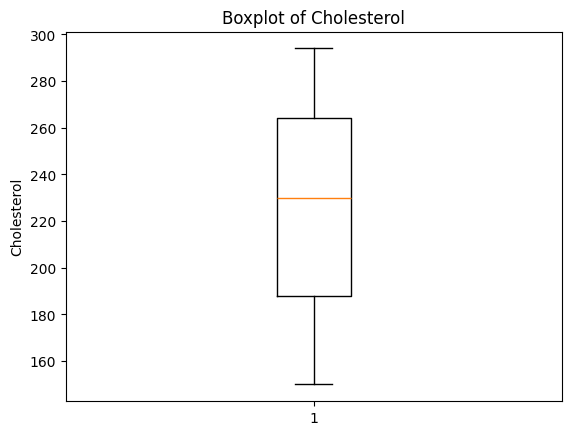

In [15]:
# Detecting Outliers Using Boxplot
# Boxplot for cholesterol to identify outliers
plt.boxplot(X_train["cholesterol"])
plt.title("Boxplot of Cholesterol")
plt.ylabel("Cholesterol")
plt.show()


In [16]:
# Capping Outliers at 95th Percentile
# Capping cholesterol outliers at 95th percentile
cap_value = X_train["cholesterol"].quantile(0.95)

X_train["cholesterol"] = np.where(
    X_train["cholesterol"] > cap_value,
    cap_value,
    X_train["cholesterol"]
)

X_test["cholesterol"] = np.where(
    X_test["cholesterol"] > cap_value,
    cap_value,
    X_test["cholesterol"]
)

print("Outliers capped successfully.")

Outliers capped successfully.


In [17]:
# Handling Categorical Variables
# Applying One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Aligning train and test columns
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join="left", axis=1, fill_value=0
)

print("Categorical variables encoded.")

Categorical variables encoded.


In [18]:
# Feature Scaling
# Initializing scaler
scaler = StandardScaler()

# Scaling numerical features
X_train_encoded[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
X_test_encoded[num_cols] = scaler.transform(X_test_encoded[num_cols])

print("Feature scaling completed.")

Feature scaling completed.


In [19]:
# Final Prepared Data Check
print("Final Training Feature Shape:", X_train_encoded.shape)
print("Final Testing Feature Shape:", X_test_encoded.shape)

print("\nSample of prepared training data:")
display(X_train_encoded.head())

Final Training Feature Shape: (210, 6)
Final Testing Feature Shape: (90, 6)

Sample of prepared training data:


,age,cholesterol,max_heart_rate,sex_male,chest_pain_non-anginal,chest_pain_typical
194,1.358329,1.524292,0.814413,False,False,True
101,-1.165379,0.681740,-1.363501,True,False,True
68,0.096475,1.501521,1.752126,True,False,True
224,-0.534452,-0.912277,-0.002305,False,False,False
37,0.867608,-1.481568,1.177398,False,False,True
